In [15]:
#imports
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [16]:
#Reading data into the dataframe
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


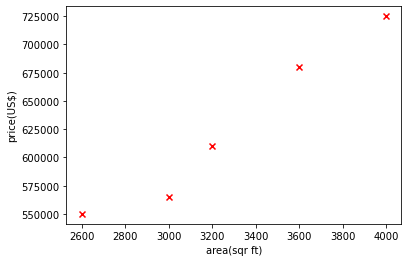

In [17]:
#Dataset Plotting
plt .xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color = 'red', marker = 'x')

In [18]:
new_df = df.drop('price', axis = 'columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [19]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [20]:
# Create linear regression object

reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [22]:
reg.predict([[3230]])

array([619210.61643836])

In [24]:
m = reg.coef_
m

array([135.78767123])

In [27]:
c = reg.intercept_
c

180616.43835616432

In [30]:
# Y = mx + c (where m is coefficient and c is intercept)

135.78767123 * 3230 + 180616.43835616432


619210.6164290643

In [31]:
# Genrate CSV files with list of home price predictions
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [32]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [34]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [35]:
area_df.to_csv("prediction.csv")